In [1]:
import pandas as pd

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 20)

In [3]:
welddb_data_path = "../welddb/welddb.data"

In [4]:
columns = [
    "Carbon concentration / (weight%)",
    "Silicon concentration / (weight%)",
    "Manganese concentration / (weight%)",
    "Sulphur concentration / (weight%)",
    "Phosphorus concentration / (weight%)",
    "Nickel concentration / (weight%)",
    "Chromium concentration / (weight%)",
    "Molybdenum concentration / (weight%)",
    "Vanadium concentration / (weight%)",
    "Copper concentration / (weight%)",
    "Cobalt concentration / (weight%)",
    "Tungsten concentration / (weight%)",
    "Oxygen concentration / parts per million by weight",
    "Titanium concentration / parts per million by weight",
    "Nitrogen concentration / parts per million by weight",
    "Aluminium concentration / parts per million by weight",
    "Boron concentration / parts per million by weight",
    "Niobium concentration / parts per million by weight",
    "Tin concentration / parts per million by weight",
    "Arsenic concentration / parts per million by weight",
    "Antimony concentration / parts per million by weight",
    "Current / A",
    "Voltage / V",
    "AC or DC",
    "Electrode positive or negative",
    "Heat input / kJ/mm",
    "Interpass temperature / deg C",
    "Type of weld; ShMA = MMA = manual metal arc, SA = SMA = submerged arc, FCA = flux cored arc, GTAA gas tungsten arc automatic, GMAA gas metal arc automatic, SAW-NG = submerged arc narrow gap, GMA-NG = gas metal arc narrow gap, ES = electroslag, TSA = tandem submerged arc.",
    "Post weld heat treatment temperature / deg C",
    "Post weld heat treatment time / hours",
    "Yield strength / MPa",
    "Ultimate tensile strength / MPa",
    "Elongation / %",
    "Reduction of Area / %",
    "Charpy temperature / deg C",
    "Charpy impact toughness / J",
    "Hardness / kg/mm2",
    "50 % FATT",
    "Primary ferrite in microstructure / %",
    "Ferrite with second phase / %",
    "Acicular ferrite / %",
    "Martensite / %",
    "Ferrite with carbide aggreagate / %",
    "Weld ID",
]

In [5]:
columns = [
    "carbon_pct",
    "silicon_pct",
    "manganese_pct",
    "sulphur_pct",
    "phosphorus_pct",
    "nickel_pct",
    "chromium_pct",
    "molybdenum_pct",
    "vanadium_pct",
    "copper_pct",
    "cobalt_pct",
    "tungsten_pct",
    "oxygen_ppm",
    "titanium_ppm",
    "nitrogen_ppm",
    "aluminium_ppm",
    "boron_ppm",
    "niobium_ppm",
    "tin_ppm",
    "arsenic_ppm",
    "antimony_ppm",
    "current_a",
    "voltage_v",
    "ac_dc",
    "electrode_polarity",
    "heat_input_kj_mm",
    "interpass_temp_c",
    "weld_type",
    "post_weld_temp_c",
    "post_weld_time_hr",
    "yield_strength_mpa",
    "ultimate_tensile_strength_mpa",
    "elongation_pct",
    "reduction_area_pct",
    "charpy_temp_deg_c",
    "charpy_impact_toughness_j",
    "hardness_kg_mm2",
    "fifty_pct_fatt",
    "primary_ferrite_pct",
    "ferrite_second_phase_pct",
    "acicular_ferrite_pct",
    "martensite_pct",
    "ferrite_carbide_aggregate_pct",
    "weld_id",
]


In [6]:
weld_df = pd.read_csv(
    welddb_data_path, sep=r"\s+", header=None, names=columns, na_values="N"
)

weld_df.shape

(1652, 44)

# Variable selection


In [7]:
# Input variables (features)

material_composition_variables = [
    "carbon_pct",
    "silicon_pct",
    "manganese_pct",
    "sulphur_pct",
    "phosphorus_pct",
    "nickel_pct",
    "chromium_pct",
    "molybdenum_pct",
    "vanadium_pct",
    "copper_pct",
    "cobalt_pct",
    "tungsten_pct",
    "oxygen_ppm",
    "titanium_ppm",
    "nitrogen_ppm",
    "aluminium_ppm",
    "boron_ppm",
    "niobium_ppm",
    "tin_ppm",
    "arsenic_ppm",
    "antimony_ppm",
]


welding_process_variables = [
    "current_a",
    "voltage_v",
    "ac_dc",
    "electrode_polarity",
    "heat_input_kj_mm",
    "interpass_temp_c",
    "weld_type",
    "post_weld_temp_c",
    "post_weld_time_hr",
]


# Output variables (targets)

mechanical_properties_variables = [
    "yield_strength_mpa",
    "ultimate_tensile_strength_mpa",
    "elongation_pct",
    "reduction_area_pct",
    "charpy_temp_deg_c",
    "charpy_impact_toughness_j",
    "hardness_kg_mm2",
    "fifty_pct_fatt",
]

microstructure_variables = [
    "primary_ferrite_pct",
    "ferrite_second_phase_pct",
    "acicular_ferrite_pct",
    "martensite_pct",
    "ferrite_carbide_aggregate_pct",
]


# Miscellaneous variables

misc_variables = ["weld_id"]

In [8]:
variables_to_remove = []

# Remove variables with more than 80% missing values
variables_to_remove.extend(
    ["tungsten_pct", "cobalt_pct", "arsenic_ppm", "antimony_ppm", "tin_ppm"]
)

# Remove variables with too many non-numeric values
variables_to_remove.append("boron_ppm")

# Update the list of material composition variables
material_composition_variables = [
    var for var in material_composition_variables if var not in variables_to_remove
]

# Update the dataframe
weld_df.drop(columns=variables_to_remove, inplace=True)

In [9]:
# Remove these output variables because they have over 90% missing values
weld_df.drop(columns=["hardness_kg_mm2", "fifty_pct_fatt"], inplace=True)

# Remove microstructure variables because it is more interesting to predict mechanical properties and they have over 94% missing values
weld_df.drop(columns=microstructure_variables, inplace=True)

In [10]:
# Extract the numeric part of the 'nitrogen_ppm' column
weld_df["nitrogen_ppm"] = weld_df["nitrogen_ppm"].str.split("tot").str[0].astype(float)

# Variable imputation


In [11]:
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import RobustScaler, MinMaxScaler, PowerTransformer
import numpy as np
from numpy import nan

In [12]:
#Remove weld_id since it doesn't give information
input_df = weld_df.copy()
input_df.drop(columns=["weld_id"], inplace=True)

#Remove outputs since we won't do imputation on them
outputs = [
    "yield_strength_mpa",
    "ultimate_tensile_strength_mpa",
    "elongation_pct",
    "reduction_area_pct",
    "charpy_temp_deg_c",
    "charpy_impact_toughness_j"
]
input_df.drop(columns = outputs, inplace = True)

In [13]:
#Preprocess column with classes

input_df = input_df[~input_df['weld_type'].isin(["GTAA", "GMAA", "SAA","NGGMA","NGSAW" ])] #Delete rows for 5 classes with a total a 37/1652 instances

# We add a column for each class
input_df["weld_type_MMA"] = np.where(input_df["weld_type"] == "MMA", 1.0, 0.0)
input_df["weld_type_SA"] = np.where(input_df["weld_type"] == "SA", 1.0, 0.0)
input_df["weld_type_TSA"] = np.where(input_df["weld_type"] == "TSA", 1.0, 0.0)
input_df["weld_type_FCA"] = np.where(input_df["weld_type"] == "FCA", 1.0, 0.0)
input_df["weld_type_ShMA"] = np.where(input_df["weld_type"] == "ShMA", 1.0, 0.0)
## REMOVE ONE OF THEM FOR LESS CORELATION

input_df["electrode_polarity_nan"] = np.where(pd.isna(input_df["ac_dc"]), nan, 0) #We keep NaN
input_df["electrode_polarity"] = np.where(input_df["electrode_polarity"] == "+", 1.0, 0.0)+ input_df["electrode_polarity_nan"] #1 if + 0 if -

input_df["ac_dc_nan"] = np.where(pd.isna(input_df["ac_dc"]), nan, 0) #We keep NaN
input_df["ac_dc"] = np.where(input_df["ac_dc"] == "AC", 1.0, 0.0) + input_df["ac_dc_nan"] # 1 if ac 0 if dc


columns_to_drop = ["weld_type","ac_dc_nan","electrode_polarity_nan"] #Drop original class columns and nan columns
input_df.drop(columns=columns_to_drop, inplace=True)


In [14]:
print(input_df.shape)
input_df.describe()

(1615, 28)


,carbon_pct,silicon_pct,manganese_pct,phosphorus_pct,nickel_pct,chromium_pct,oxygen_ppm,nitrogen_ppm,current_a,voltage_v,ac_dc,electrode_polarity,heat_input_kj_mm,post_weld_temp_c,post_weld_time_hr,weld_type_MMA,weld_type_SA,weld_type_TSA,weld_type_FCA,weld_type_ShMA
count,1615.000000,1615.000000,1615.000000,1605.000000,660.000000,747.000000,1233.000000,1230.000000,1367.000000,1367.000000,1400.000000,1400.000000,1615.000000,1602.000000,1602.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000
mean,0.075083,0.329721,1.217022,0.013036,0.429105,1.981416,441.898621,108.488618,279.582297,27.575538,0.027143,0.967857,1.692000,295.355181,4.979014,0.705882,0.161610,0.053870,0.053870,0.024768
std,0.023854,0.112572,0.374465,0.019841,0.806317,2.983767,145.089600,91.848610,192.879366,12.684031,0.162558,0.176442,1.307125,282.006371,6.126660,0.455786,0.368207,0.225831,0.225831,0.155465
min,0.029000,0.040000,0.270000,0.002000,0.000000,0.000000,132.000000,21.000000,115.000000,20.000000,0.000000,0.000000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.061000,0.270000,0.970000,0.007000,0.000000,0.000000,371.000000,67.000000,170.000000,21.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.074000,0.320000,1.300000,0.010000,0.060000,0.410000,423.000000,81.500000,170.000000,21.000000,0.000000,1.000000,1.000000,250.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.082000,0.360000,1.450000,0.014000,0.270000,2.300000,470.000000,101.000000,300.000000,30.000000,0.000000,1.000000,2.000000,580.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,0.180000,1.140000,2.250000,0.250000,3.500000,10.200000,1650.000000,552.000000,900.000000,75.360000,1.000000,1.000000,7.900000,760.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
#Impute for non numerical values

for c in input_df.columns : # we check each cell of input_df to transform it into a float
    str_indexes =[]
    float_values = []
    for k in input_df.index:
        cell = input_df.loc[k,c]
        if type(cell) == str : 
            try :
                input_df.loc[k,c] = float(cell) #transform cell into float if possible
                float_values.append(float(cell))
            except Exception :
                str_indexes.append(k)
    for j in str_indexes : #different cases if cell couldn't be transformed into float
        cell = input_df.loc[j,c] 
        if '<'in cell : # cell of form "<x" takes the mean of the values < x
            max = float(cell.replace("<",""))
            L_cell = [x for x in float_values if x < max]
            if len(L_cell) == 0 : # if no values < x takes x
                input_df.loc[j,c] = max
            else :
                input_df.loc[j,c] = sum(L_cell)/len(L_cell)
        elif "-" in cell : # cell of form "x1-x2" Takes the mean of the x1 < values < x2
            min,max = float(cell.split("-")[0]), float(cell.split("-")[1])
            L_cell = [x for x in float_values if min < x < max]
            if len(L_cell) == 0 : # if no  x1 <values < x2 takes (x1+x2)/2
                input_df.loc[j,c] = (min+max)/2
            else :
                input_df.loc[j,c] = sum(L_cell)/len(L_cell)
        else : 
            raise ValueError("This case is not treated")

In [16]:
# Impute for nan

imputer = IterativeImputer(sample_posterior=True)
input_np = input_df.copy().to_numpy()
input_np = imputer.fit_transform(input_np)
input_df = pd.DataFrame(input_np, columns = input_df.columns, index=input_df.index)

# Assert values are between 0 and 100 for pct
columns_pct =[
    "sulphur_pct",
    "phosphorus_pct",
    "nickel_pct",
    "chromium_pct",
    "molybdenum_pct",
    "vanadium_pct",
    "copper_pct"]
for c in columns_pct :
    input_df[c] = np.where( input_df[c] < 0.0, 0.0, input_df[c] )
    input_df[c] = np.where( input_df[c] > 100.0, 100.0, input_df[c] )

#Assert values or either 0 or 1 for binary classes
columns_classes = [
    "electrode_polarity",
    "ac_dc"]
for c in columns_classes :
    input_df[c] = np.where( input_df[c] < 0.5, 0.0, input_df[c] )
    input_df[c] = np.where( input_df[c] >= 0.5, 1.0, input_df[c])

# Assert values are superior to 0 for other features
columns_other =["oxygen_ppm",
    "titanium_ppm",
    "nitrogen_ppm",
    "aluminium_ppm",
    "niobium_ppm",
    "current_a",
    "voltage_v",
    "interpass_temp_c",
    "post_weld_temp_c",
    "post_weld_time_hr"]
for c in columns_other :
    input_df[c] = np.where( input_df[c] < 0.0, 0.0, input_df[c] )

    
# There are some features that don't need to be checked because there is no imputation such as carbon_pct or weld_type_MMA for instance


In [17]:
input_df.describe()

,carbon_pct,silicon_pct,manganese_pct,sulphur_pct,phosphorus_pct,nickel_pct,chromium_pct,molybdenum_pct,vanadium_pct,copper_pct,oxygen_ppm,titanium_ppm,nitrogen_ppm,aluminium_ppm,niobium_ppm,current_a,voltage_v,ac_dc,electrode_polarity,heat_input_kj_mm,interpass_temp_c,post_weld_temp_c,post_weld_time_hr,weld_type_MMA,weld_type_SA,weld_type_TSA,weld_type_FCA,weld_type_ShMA
count,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000
mean,0.075083,0.329721,1.217022,0.009731,0.013540,0.641164,1.874968,0.336313,0.050028,0.209255,440.508712,75.579758,113.605015,106.180977,149.606186,273.206945,27.048897,0.026625,0.966563,1.692000,203.959460,293.877684,4.960679,0.705882,0.161610,0.053870,0.053870,0.024768
std,0.023854,0.112572,0.374465,0.012265,0.023146,0.752034,2.574527,0.399244,0.075750,0.279095,148.281188,88.868886,91.187176,133.053701,196.279060,186.388595,12.206485,0.161036,0.179829,1.307125,39.435205,281.474167,6.111717,0.455786,0.368207,0.225831,0.225831,0.155465
min,0.029000,0.040000,0.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.038690,7.814918,0.000000,0.000000,0.600000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.061000,0.270000,0.970000,0.006000,0.007000,0.001708,0.000000,0.000000,0.000179,0.000000,365.000000,12.651677,67.000000,2.000000,0.000000,170.000000,21.000000,0.000000,1.000000,1.000000,200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.074000,0.320000,1.300000,0.007000,0.010000,0.315644,0.743986,0.170464,0.010000,0.098932,424.000000,41.000000,84.000000,51.286458,60.000000,170.000000,21.000000,0.000000,1.000000,1.000000,200.000000,250.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.082000,0.360000,1.450000,0.010000,0.014000,1.060000,2.400000,0.540000,0.073091,0.330909,480.969777,110.066489,122.366554,170.220612,238.205398,300.000000,30.000000,0.000000,1.000000,2.000000,200.000000,580.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,0.180000,1.140000,2.250000,0.163248,0.396206,3.500000,10.765507,1.534241,0.320000,1.630000,1650.000000,690.000000,552.000000,680.000000,1000.000000,900.000000,78.384949,1.000000,1.000000,7.900000,300.000000,760.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Scaling

In [18]:
# Scale the data 
temp_df = input_df.copy()
columns_classes = [
    "electrode_polarity",
    "ac_dc",
    "weld_type_MMA",
    "weld_type_SA",
    "weld_type_TSA",
    "weld_type_FCA",
    "weld_type_ShMA"]
temp_df.drop(columns = columns_classes, inplace= True) # we don't rescale for the classes

# Min-max scaling for during-process variables | their value depends whether or not the process occurs (lot of zeros)
columns_to_min_max = ["heat_input_kj_mm", "interpass_temp_c", "post_weld_temp_c", "post_weld_time_hr"]
transformer_min_max = MinMaxScaler()
# temp_df[columns_to_min_max] = transformer_min_max.fit_transform(temp_df[columns_to_min_max])
temp_df[columns_to_min_max] = temp_df[columns_to_min_max].apply(lambda x: np.log1p(x)) # x -> log(1 + x)
# transformer_power = PowerTransformer('yeo-johnson')
# temp_df[columns_to_min_max] = transformer_power.fit_transform(temp_df[columns_to_min_max])

# Scaling percent with an enlarged robust scaler :
columns_pct = [col for col in  temp_df.columns if "pct" in col]
transformer_robust1 = RobustScaler(quantile_range=(10.0,90.0))
temp_df[columns_pct] = transformer_robust1.fit_transform(temp_df[columns_pct])

# Robust scaling for other metric variables
columns_to_scale = [col for col in temp_df.columns if (col not in set(columns_to_min_max) | set(columns_pct))]
transformer_robust2 = RobustScaler(quantile_range=(25.0,75.0))
temp_df[columns_to_scale] = transformer_robust2.fit_transform(temp_df[columns_to_scale])

input_df.drop(columns=columns_to_min_max+columns_pct+columns_other,inplace=True) #Add the nonscaled classes
input_df = pd.concat([temp_df, input_df], axis = 1)

In [19]:
input_df.describe()

,carbon_pct,silicon_pct,manganese_pct,sulphur_pct,phosphorus_pct,nickel_pct,chromium_pct,molybdenum_pct,vanadium_pct,copper_pct,oxygen_ppm,titanium_ppm,nitrogen_ppm,aluminium_ppm,niobium_ppm,current_a,voltage_v,heat_input_kj_mm,interpass_temp_c,post_weld_temp_c,post_weld_time_hr,ac_dc,electrode_polarity,weld_type_MMA,weld_type_SA,weld_type_TSA,weld_type_FCA,weld_type_ShMA
count,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000
mean,0.016666,0.038885,-0.076127,0.273147,0.252865,0.186078,0.188731,0.164206,0.220409,0.189721,0.142354,0.354974,0.534709,0.326325,0.376172,0.793900,0.672100,0.911061,5.301338,3.750053,1.183135,0.026625,0.966563,0.705882,0.161610,0.053870,0.053870,0.024768
std,0.366989,0.450287,0.343546,1.226501,1.653270,0.429888,0.429621,0.395291,0.417110,0.479954,1.278619,0.912273,1.646972,0.790948,0.823991,1.433758,1.356276,0.363228,0.224415,2.963990,1.124956,0.161036,0.179829,0.455786,0.368207,0.225831,0.225831,0.155465
min,-0.692308,-1.120000,-0.944954,-0.700000,-0.714286,-0.180432,-0.124152,-0.168777,-0.055064,-0.170131,-3.656125,-0.420881,-1.517161,-0.304876,-0.251883,-0.784318,-1.465009,0.470004,3.044522,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.200000,-0.200000,-0.302752,-0.100000,-0.214286,-0.179456,-0.124152,-0.168777,-0.054081,-0.170131,-0.508753,-0.291006,-0.307045,-0.292987,-0.251883,0.000000,0.000000,0.693147,5.303305,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,5.303305,5.525453,1.098612,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.123077,0.160000,0.137615,0.300000,0.285714,0.425499,0.276346,0.365877,0.347404,0.398927,0.491247,0.708994,0.692955,0.707013,0.748117,1.000000,1.000000,1.098612,5.303305,6.364751,2.397895,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.630769,3.280000,0.871560,15.624775,27.586152,1.820283,1.672330,1.350274,1.706982,2.632952,10.571720,6.662231,8.452757,3.737435,3.946174,5.615385,6.376105,2.186051,5.707110,6.634633,3.218876,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Output preparation

In [20]:
output_df = weld_df[outputs + ["weld_type"]].copy()

# Listwise delition on the same insatnces as the input
output_df = output_df[~output_df['weld_type'].isin(["GTAA", "GMAA", "SAA","NGGMA","NGSAW" ])] #Delete rows for 5 classes with a total a 37/1652 instances
output_df.drop(columns=["weld_type"], inplace=True)

In [21]:
import itertools

# Which columns to combine to create a score, whithout dropping to many instances ?

min_nb_of_instances = 500

for nb_col_combinations in range(1, len(outputs)+1):

    # Create all unique sets of columns
    column_sets = list(itertools.combinations(outputs, nb_col_combinations))

    non_nan_set_counts = {}

    for col_set in column_sets:
        # Drop rows with NaN in either column and count the non-NaN rows
        count_non_nan = output_df[list(col_set)].dropna().shape[0]
        if count_non_nan >= min_nb_of_instances:
            non_nan_set_counts[col_set] = count_non_nan

    # Print the results
    if len(non_nan_set_counts)>0:
        print(f"\n{nb_col_combinations}-score :")
        for col_set, count in non_nan_set_counts.items():
            print(f"Non-NaN rows for columns {col_set} : {count}")


1-score :
Non-NaN rows for columns ('yield_strength_mpa',) : 762
Non-NaN rows for columns ('ultimate_tensile_strength_mpa',) : 720
Non-NaN rows for columns ('elongation_pct',) : 682
Non-NaN rows for columns ('reduction_area_pct',) : 693
Non-NaN rows for columns ('charpy_temp_deg_c',) : 860
Non-NaN rows for columns ('charpy_impact_toughness_j',) : 860

2-score :
Non-NaN rows for columns ('yield_strength_mpa', 'ultimate_tensile_strength_mpa') : 696
Non-NaN rows for columns ('yield_strength_mpa', 'elongation_pct') : 673
Non-NaN rows for columns ('yield_strength_mpa', 'reduction_area_pct') : 684
Non-NaN rows for columns ('ultimate_tensile_strength_mpa', 'elongation_pct') : 648
Non-NaN rows for columns ('ultimate_tensile_strength_mpa', 'reduction_area_pct') : 659
Non-NaN rows for columns ('elongation_pct', 'reduction_area_pct') : 673
Non-NaN rows for columns ('charpy_temp_deg_c', 'charpy_impact_toughness_j') : 860

3-score :
Non-NaN rows for columns ('yield_strength_mpa', 'ultimate_tensile

In [22]:
# We choose the following score :

# 3-score :
# ('yield_strength_mpa', 'ultimate_tensile_strength_mpa', 'elongation_pct') : 647

# UTS is the maximum tensile stress a material can withstand before breaking. It indicates how much force the solder can resist in tension before it fails.
# A higher UTS means the solder can bear more significant mechanical loads without failing. This is crucial in structural soldering.

# Yield strength is the stress at which a material begins to deform plastically.
# Solder with moderate yield strength ensures that the joint can flex and accommodate small stresses without permanent deformation.

# Elongation measures a material's ductility, or its ability to deform plastically without breaking. 
# In structural soldering, joints are often subjected to repeated stresses (due to temperature changes, vibrations, etc.). 
# A ductile solder can absorb these stresses by stretching slightly rather than failing suddenly

In [23]:
# We use the set ('yield_strength_mpa', 'ultimate_tensile_strength_mpa', 'elongation_pct') to create a score for 647 / 1615 (40%) of the instances

from sklearn.preprocessing import RobustScaler

ys_ratio, uts_ratio, elong_ratio = 1.0, 3.0, 1.0
scaler_out = RobustScaler()

score_arr = np.transpose(scaler_out.fit_transform(output_df[["yield_strength_mpa","ultimate_tensile_strength_mpa","elongation_pct"]]))
output_df["score"] = ys_ratio * score_arr[0] + uts_ratio * score_arr[1] + elong_ratio * score_arr[2]

In [24]:
output_df.describe()

,yield_strength_mpa,ultimate_tensile_strength_mpa,elongation_pct,reduction_area_pct,charpy_temp_deg_c,charpy_impact_toughness_j,score
count,762.000000,720.000000,682.000000,693.000000,860.000000,860.000000,647.000000
mean,506.671391,591.727917,26.365103,71.875758,-34.997674,87.067442,0.402398
std,92.090790,87.241725,4.901947,8.967958,34.756897,49.363140,2.624994
min,315.000000,447.000000,10.600000,17.000000,-114.000000,3.000000,-4.714286
25%,443.000000,531.000000,23.000000,68.000000,-60.000000,38.000000,-1.387476
50%,494.000000,573.000000,27.000000,75.000000,-40.000000,100.000000,-0.095463
75%,555.000000,642.000000,30.000000,78.000000,-18.750000,100.000000,1.828475
max,920.000000,1151.000000,37.000000,83.000000,188.000000,233.000000,17.082336


In [25]:
output_df_score = pd.DataFrame(output_df["score"], columns= ["score"])
output_df_score.describe()

,score
count,647.000000
mean,0.402398
std,2.624994
min,-4.714286
25%,-1.387476
50%,-0.095463
75%,1.828475
max,17.082336


In [26]:
output_df_class = output_df_score.copy()
q1,q3 = output_df_score["score"].quantile([0.25, 0.75])
print(f"Q1 of score (25%) : {q1}")
print(f"Q3 of score (75%) : {q3}")


output_df_class["score_nan"] = np.where(pd.isna(output_df_class["score"]), nan, 0) #We keep NaN
output_df_class["class_bad"] = np.where( output_df_class["score"] <= q1, 1.0, 0) + output_df_class["score_nan"]
output_df_class["class_good"] = np.where( (q1 <= output_df_class["score"]) & (output_df_class["score"] <= q3), 1.0, 0) + output_df_class["score_nan"]
output_df_class["class_very_good"] = np.where( output_df_class["score"] >= q3, 1.0, 0) + output_df_class["score_nan"]

output_df_class.drop(columns = ["score","score_nan"], inplace = True)

output_df_class.describe()

Q1 of score (25%) : -1.3874758687258684
Q3 of score (75%) : 1.8284749034749037


,class_bad,class_good,class_very_good
count,647.000000,647.000000,647.000000
mean,0.250386,0.499227,0.250386
std,0.433571,0.500386,0.433571
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.500000,1.000000,0.500000
max,1.000000,1.000000,1.000000


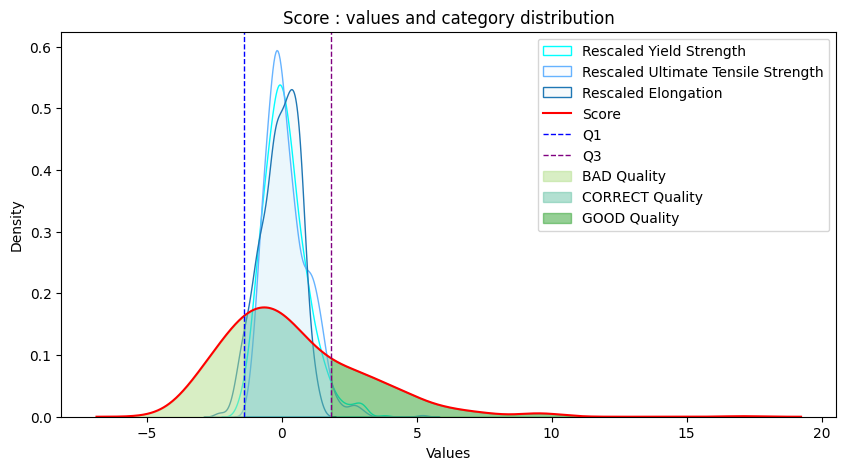

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title("Score : values and category distribution")
# plt.show()

colors_blue = ['#1f77b4', '#66b3ff', '#00ffff']  # Dark blue, medium blue, cyan
sns.kdeplot(score_arr[0], fill=True, alpha=0.03, color=colors_blue[2], ax=ax, label="Rescaled Yield Strength")
sns.kdeplot(score_arr[1], fill=True, alpha=0.03, color=colors_blue[1], ax=ax, label="Rescaled Ultimate Tensile Strength")
sns.kdeplot(score_arr[2], fill=True, alpha=0.03, color=colors_blue[0], ax=ax, label="Rescaled Elongation")

score_kde = sns.kdeplot(output_df["score"], gridsize=1000, fill=False, color="red", ax=ax, label="Score")
# x = np.linspace(df['values'].min(), df['values'].max(), 1000)
x = score_kde.get_lines()[0].get_data()[0]
y = score_kde.get_lines()[0].get_data()[1]

plt.axvline(x=q1, color='blue', linestyle='--', linewidth=1, label="Q1")
plt.axvline(x=q3, color='purple', linestyle='--', linewidth=1, label="Q3")

colors_green = ['#2ca02c', '#66c2a5', '#b2df8a']  # Dark green, medium green, light green
plt.fill_between(x, y, where=(x <= q1), color=colors_green[2], alpha=0.5, label="BAD Quality")
plt.fill_between(x, y, where=((x >= q1) & (x <= q3)), color=colors_green[1], alpha=0.5, label="CORRECT Quality")
plt.fill_between(x, y, where=(x > q3), color=colors_green[0], alpha=0.5, label="GOOD Quality")

ax.set_xlabel('Values')

# Show the plot
plt.legend()
plt.show()

# PCA

In [28]:
from sklearn.decomposition import PCA
import pandas as pd

explained_variance_traget = 0.95

categorical_columns = ["ac_dc", "electrode_polarity","weld_type_MMA","weld_type_SA","weld_type_TSA","weld_type_FCA","weld_type_ShMA"]
numerical_df = input_df.drop(columns=categorical_columns)
categorical_df = input_df[categorical_columns]

pca = PCA(0.9) # Select components such that the amount of variance that needs to be explained is greater than 95%
principal_components = pca.fit_transform(numerical_df)
pca_columns = [f'PC{i+1}' for i in range(principal_components.shape[1])]
# pca_df = pd.DataFrame(principal_components, columns=pca_columns)
pca_df = pd.DataFrame(principal_components, columns=pca_columns, index=input_df.index)

# input_df_pca = pd.concat([pca_df, categorical_df.reset_index(drop=True)], axis=1)
input_df_pca = pd.concat([pca_df, categorical_df], axis=1)

print(f"[ PCA pour un explicabilité de la variance de {explained_variance_traget * 100} % ]")
print(f"{numerical_df.shape[1]} composantes numériques --> {principal_components.shape[1]} composantes principales")

print("\nDataset final avec les composantes PCA  et  les colonnes catégoriques :")
input_df_pca.describe()

[ PCA pour un explicabilité de la variance de 95.0 % ]
21 composantes numériques --> 7 composantes principales

Dataset final avec les composantes PCA  et  les colonnes catégoriques :


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,ac_dc,electrode_polarity,weld_type_MMA,weld_type_SA,weld_type_TSA,weld_type_FCA,weld_type_ShMA
count,1.615000e+03,1.615000e+03,1.615000e+03,1.615000e+03,1.615000e+03,1.615000e+03,1.615000e+03,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000
mean,1.759858e-16,-7.039433e-17,-1.759858e-17,-1.407887e-16,1.143908e-16,-7.919362e-17,5.279575e-17,0.026625,0.966563,0.705882,0.161610,0.053870,0.053870,0.024768
std,3.245457e+00,2.176942e+00,1.673395e+00,1.633019e+00,1.206561e+00,9.222106e-01,8.450432e-01,0.161036,0.179829,0.455786,0.368207,0.225831,0.225831,0.155465
min,-5.266385e+00,-1.964063e+00,-7.191469e+00,-1.141854e+01,-4.377872e+00,-1.813525e+00,-2.749731e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-3.814472e+00,-1.159585e+00,-1.074050e+00,-1.028125e+00,-5.613329e-01,-6.204554e-01,-4.424148e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.963158e+00,-7.181885e-01,-2.023455e-01,-2.994802e-01,-2.200282e-02,-1.904112e-01,1.812014e-02,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2.416640e+00,7.263457e-01,5.627273e-01,7.218708e-01,5.961705e-01,3.910632e-01,4.363815e-01,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,5.042538e+00,2.633167e+01,8.947026e+00,5.282311e+00,9.384084e+00,5.567257e+00,2.787773e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
# Principal components visualization

try :
    import plotly.express as px

    loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

    fig = px.scatter(input_df_pca[pca_columns], x="PC1", y="PC2")

    for i, feature in enumerate(numerical_df.columns):
        fig.add_annotation(
            ax=0, ay=0,
            axref="x", ayref="y",
            x=loadings[i, 0],
            y=loadings[i, 1],
            showarrow=True,
            arrowsize=2,
            arrowhead=2,
            xanchor="right",
            yanchor="top"
        )
        fig.add_annotation(
            x=loadings[i, 0],
            y=loadings[i, 1],
            ax=0, ay=0,
            xanchor="center",
            yanchor="bottom",
            text=feature,
            yshift=5,
        )
    fig.update_layout(
        title={
            'text': "Biplot visualization of PCA",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'}
    )
    fig.show()
except Exception:
    print("plotly.express is needed for PCA components visualization")


plotly.express is needed for PCA components visualization


Text(0.5, 1.0, 'The effect of features on each components')

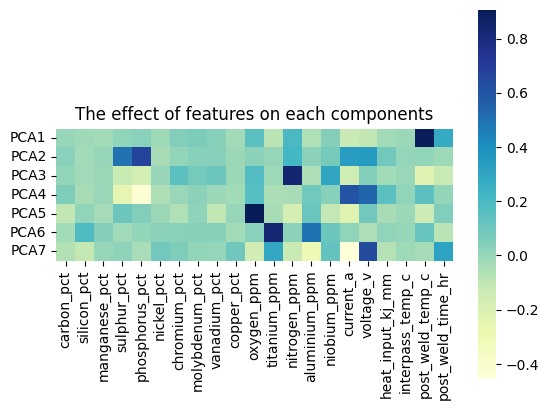

In [30]:
# Effect of variables on each components
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(pca.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(X_test) for X_test in range(1,pca.n_components_+1)],
                 xticklabels=list(numerical_df.columns),
                 cbar_kws={"orientation": "vertical"})
plt.yticks(rotation=0)
ax.set_aspect("equal")
plt.title('The effect of features on each components')

# Save dataset after preprocessing

In [31]:
assert(input_df.index.equals(output_df.index))
assert(input_df.index.equals(input_df_pca.index))
assert(input_df.index.equals(output_df_score.index))

In [32]:
input_df.to_csv("input_df.csv")
input_df_pca.to_csv("input_df_pca.csv")
output_df_class.to_csv("output_df_class.csv")
output_df_score.to_csv("output_df_score.csv")